# Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Constants

In [85]:
nm = 10**(-9.)
N = 6.022*10**23.

R = 10*nm
c_0s = np.array([.00001, .00003, .0001, .0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1])*N*10**(3.)

mu = 6.5*10**(-8.)

E = 1./(10**(-6.))
phi_0 = 100*10**(-3.)

k_B = 1.38*10**(-23.)
T = 300.

e = 1.6*10**(-19.)

epsilon=8.85*10**(-12.)*80

In [86]:
G_bulks = [4*R*c_0*e*mu*E for c_0 in c_0s]

1.37887990079e-07


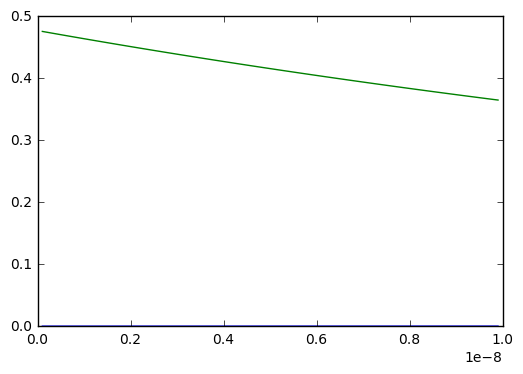

7.96096681901e-08


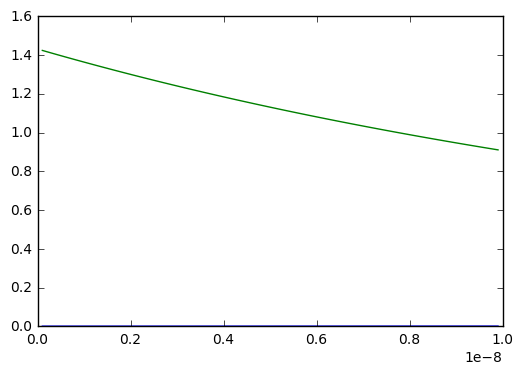

4.36040110632e-08


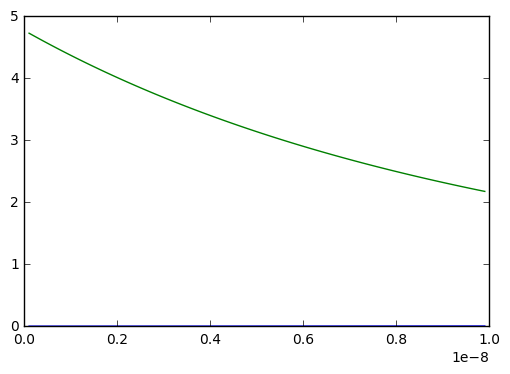

2.51747875251e-08


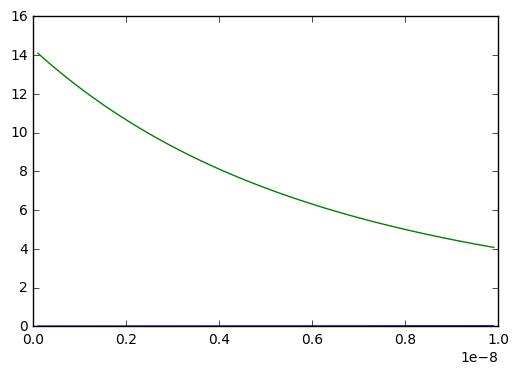

1.37887990079e-08


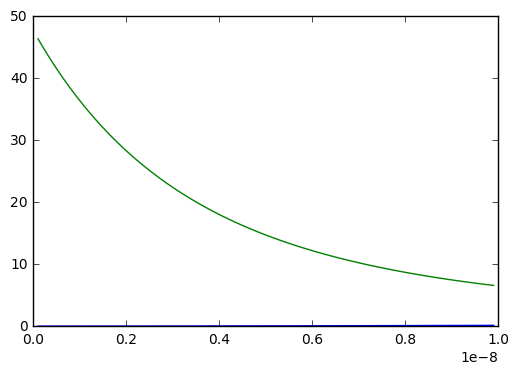

7.96096681901e-09


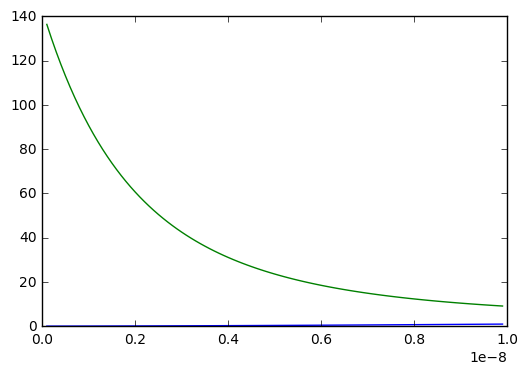

4.36040110632e-09


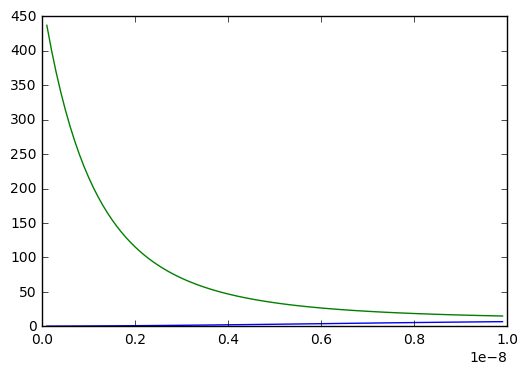

2.51747875251e-09


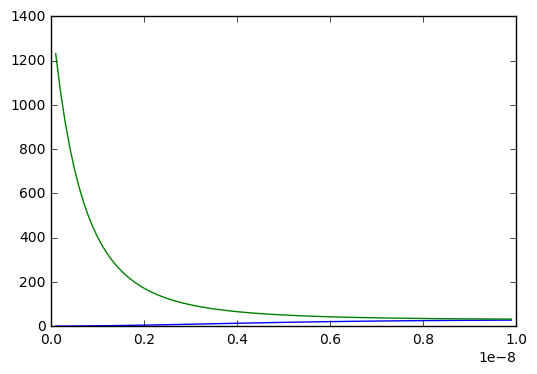

1.37887990079e-09


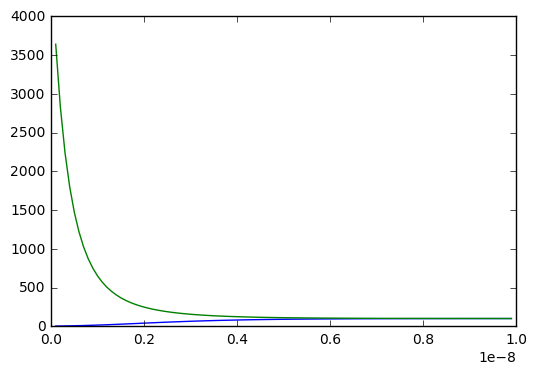

7.96096681901e-10


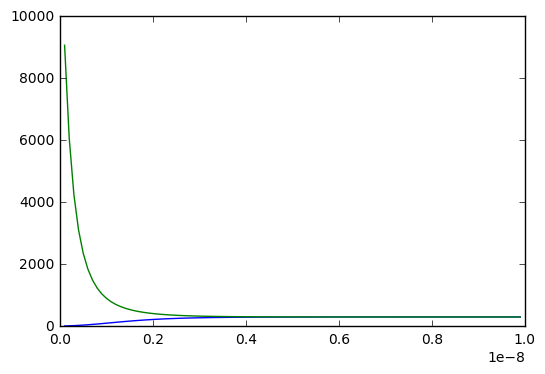

4.36040110632e-10


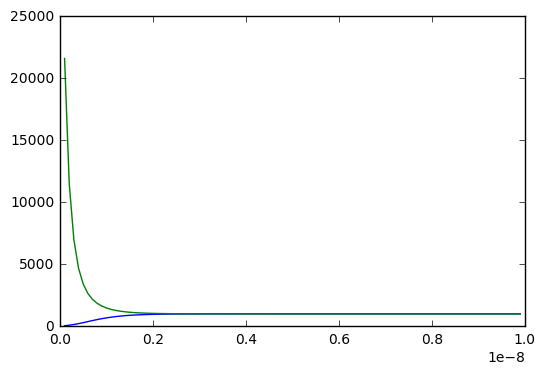

In [92]:
Gs = []
for i in range(len(c_0s)):
    c_0 = c_0s[i]
    phi0star = e*phi_0/(k_B*T)
    lambda_D = np.sqrt(epsilon*k_B*T/(e**2.*c_0))
    
    print lambda_D
    
    def integrand(y):
        return 2*c_0*(np.exp(-phi0star*np.exp(-y/lambda_D)) + np.exp(phi0star*np.exp(-y/lambda_D)))*e*mu*E
    
    ys = np.array([.1*j*nm for j in range(1, 100)])

    
    plt.plot(ys, [c_0*np.exp(-phi0star*np.exp(-y/lambda_D))/N for y in ys])
    plt.plot(ys, [c_0*np.exp(phi0star*np.exp(-y/lambda_D))/N for y in ys])
    plt.show()
    
    Gs.append(integrate.quad(integrand, 0, R)[0])

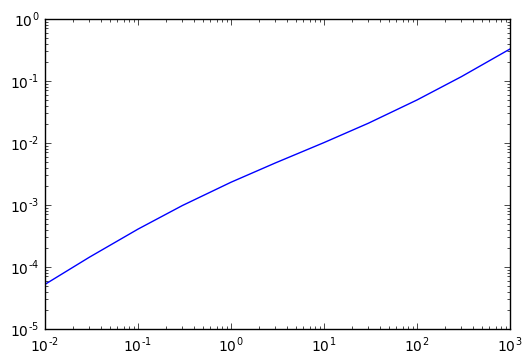

In [97]:
plt.loglog(c_0s/N, Gs)
#plt.semilogx(c_0s, G_bulks)
plt.show()